# Problem Statement

- ` The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our  study in mind. `
-`This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.`

- `insight:`
    - `it is Regression type problem`

In [78]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle

# Data Preprocessing And Exploratory Data Analysis

In [79]:
df=pd.read_csv("insurance (1).csv")

In [80]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [81]:
df.shape

(1338, 7)

(1338, 7)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int

In [83]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## Finding Outlier

In [84]:
qualitative=df.select_dtypes(include='object')
quantity= df.select_dtypes(include=['int','float'])

In [85]:
qualitative

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [86]:
quantity

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


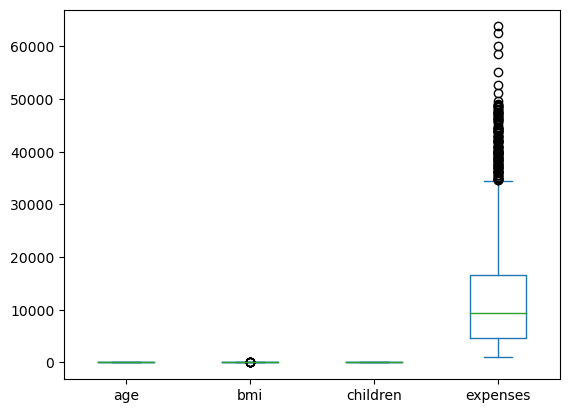

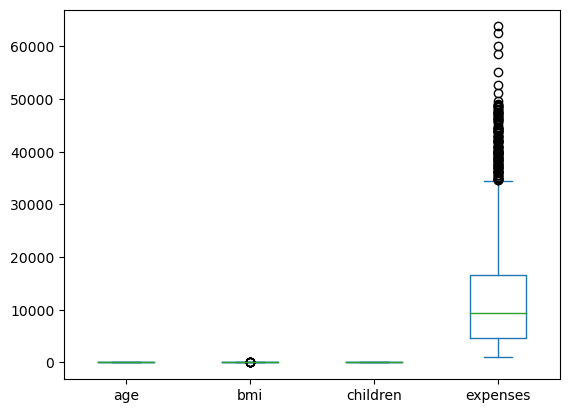

In [87]:
quantity.plot(kind='box')
plt.show()

Text(0.5, 1.0, 'age')

Text(0.5, 1.0, 'age')

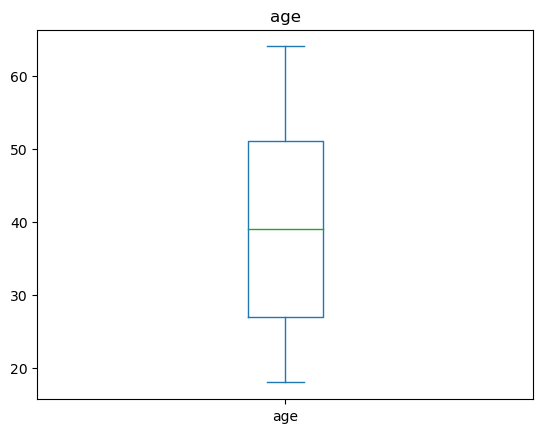

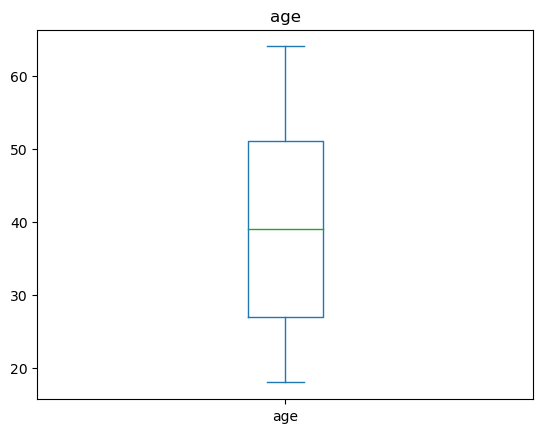

In [88]:
df['age'].plot(kind='box')
plt.title('age')

Text(0.5, 1.0, 'bmi')

Text(0.5, 1.0, 'bmi')

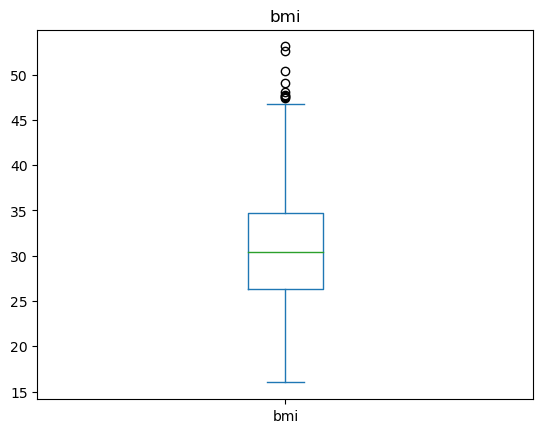

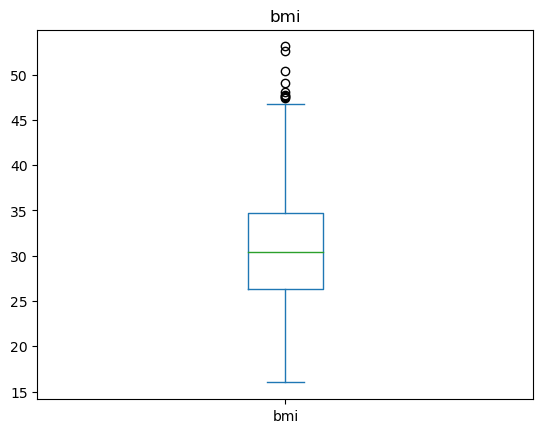

In [89]:
df['bmi'].plot(kind='box')
plt.title('bmi')

Text(0.5, 1.0, 'children')

Text(0.5, 1.0, 'children')

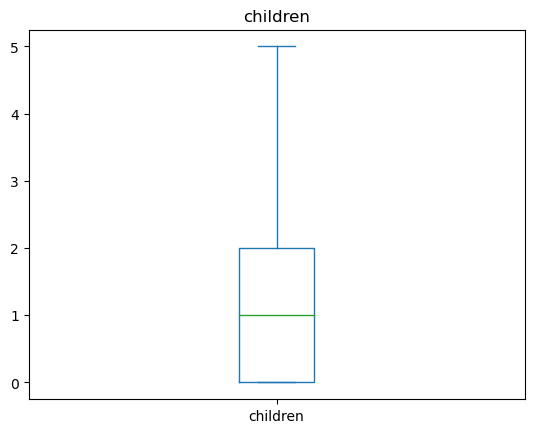

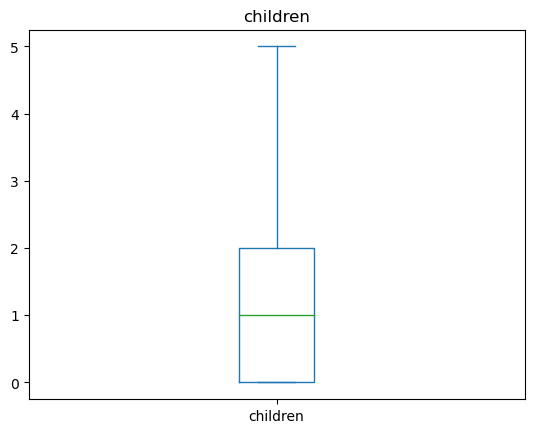

In [90]:
df['children'].plot(kind='box')
plt.title('children')

- Insight: 
    - [row 1338, column 6(excluding target column)]
    - 3 columns(quality) and 3 columns (quant.)
    - No missing value
    - outlier only at bmi columns

In [91]:
for i in qualitative.columns:
    print(i)

sex
smoker
region
sex
smoker
region


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


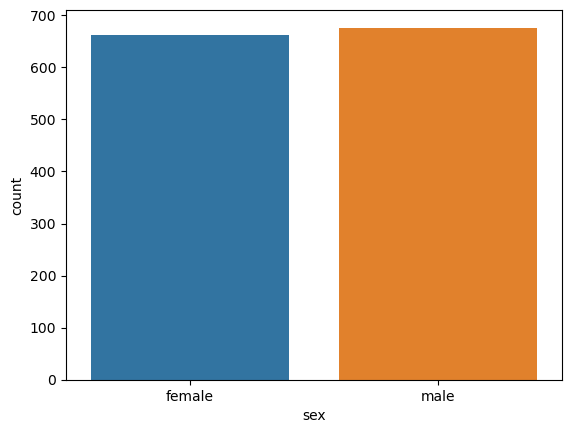

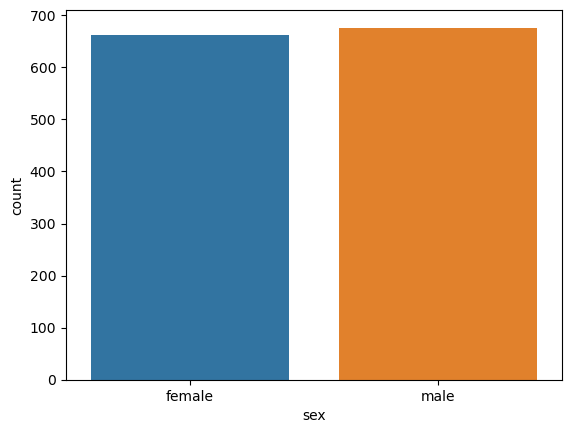

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


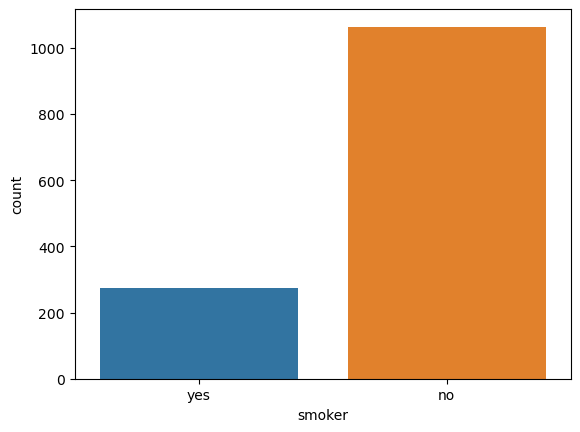

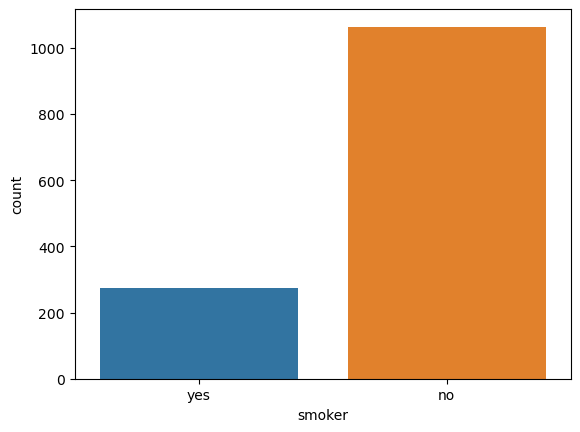

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


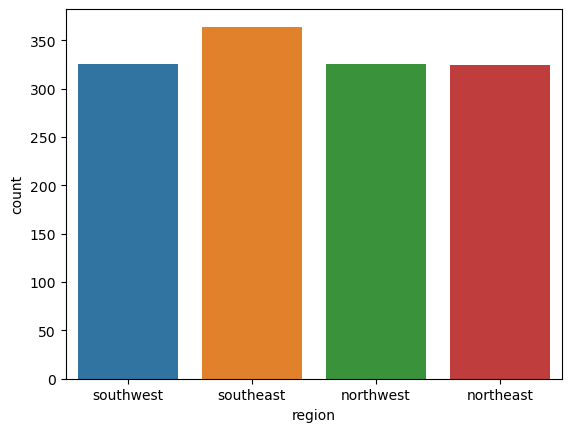

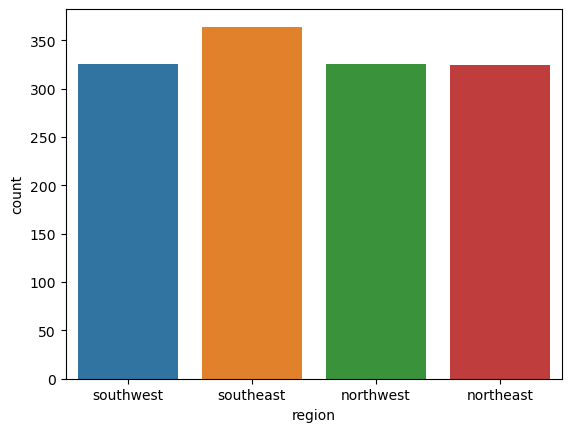

In [92]:
for i in qualitative.columns:
    sns.countplot(df[f'{i}'])
    plt.show()
                     

In [93]:
import warnings
warnings.warn('ignore')

C:\Users\Hp\AppData\Local\Temp\ipykernel_18524\258987801.py:2: UserWarning: ignore
  warnings.warn('ignore')
C:\Users\Hp\AppData\Local\Temp\ipykernel_18524\258987801.py:2: UserWarning: ignore
  warnings.warn('ignore')


In [94]:
quantity.columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


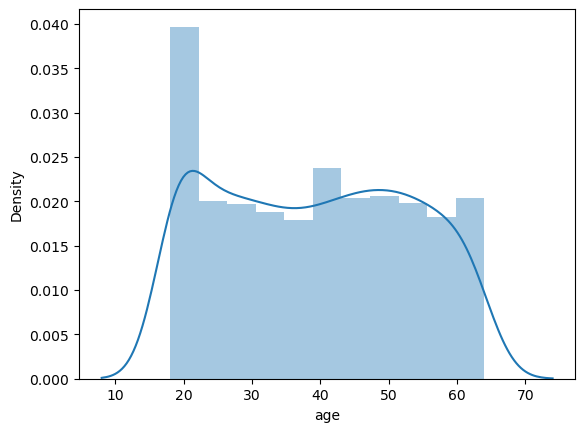

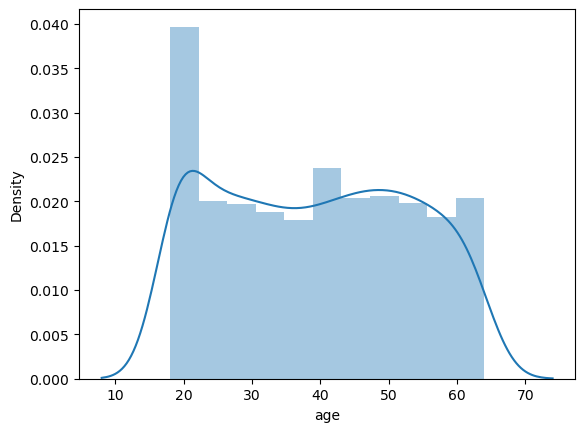

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


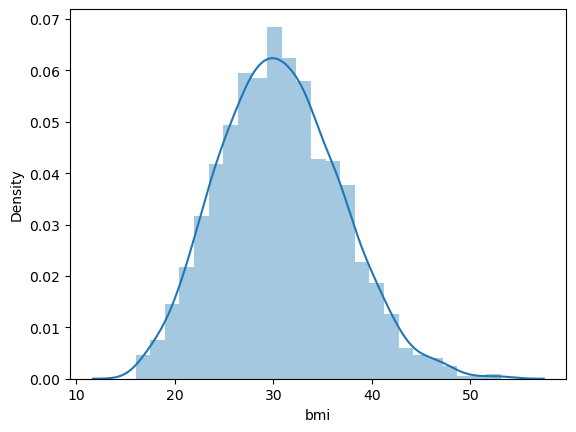

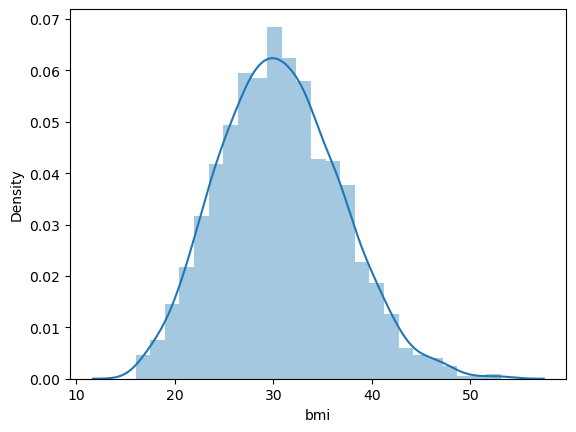

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


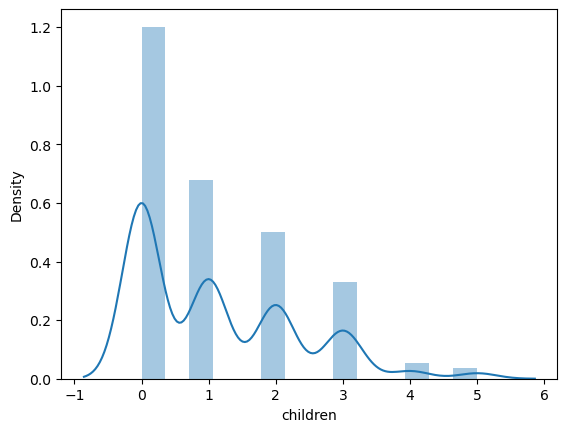

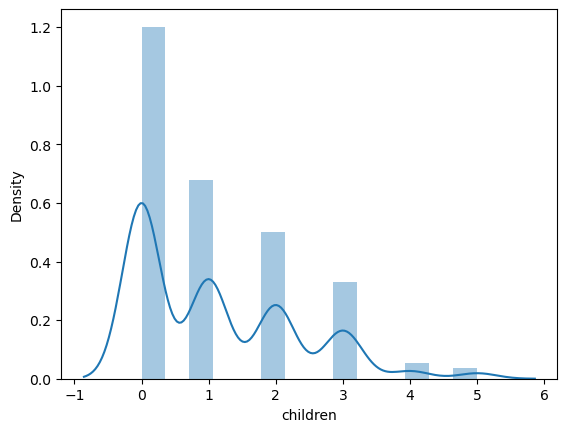

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


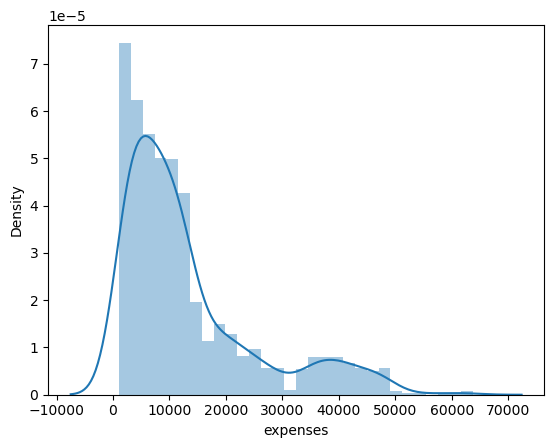

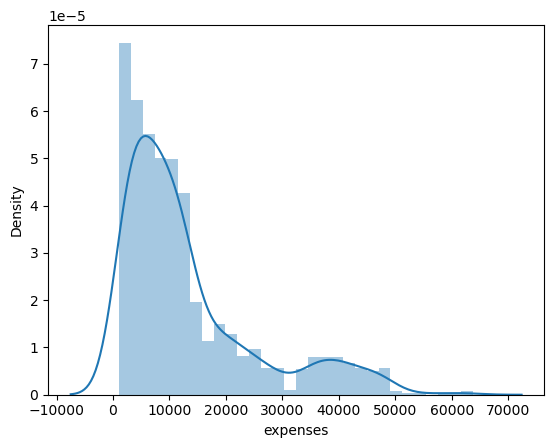

In [95]:
for i in quantity.columns:
    sns.distplot(df[f'{i}'])
    plt.show()

`insight:`
   - `  childern columns data is right skew data`
   - `  expenses also right but it is target columns so we do not have to do any preprocessing `

### Checking the statistic values

In [96]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


- Age: The dataset includes people with ages ranging from 18 to 64, with a mean age of 39.2 years. The standard deviation of age is 14.0 years, indicating a fairly wide spread of ages in the dataset.

- Sex: The dataset includes approximately equal numbers of males and females, with a mean of 0.51 indicating a slightly higher proportion of males.

- BMI: The mean BMI in the dataset is 30.7, which falls into the "obese" range according to the CDC's BMI guidelines. The standard deviation of BMI is 6.1, indicating a fairly wide spread of BMIs in the dataset.

- Children: The dataset includes people with anywhere from 0 to 5 children, with a mean of 1.1 children per person.

- Smoker: Around 20% of the people in the dataset are smokers, with a mean of 0.2 indicating that smokers are in the minority.

- Region: The dataset includes people from four different regions of the United States, labeled 1 through 4.

- Expenses: The mean expense in the dataset is 13,270.42 dollars, with a standard deviation of 12,110.01 dollars. The minimum expense is 1,121.87 dollars and the maximum expense is 63,770.43 dollars. The distribution of expenses is likely skewed, as the median (50th percentile) expense is only 9,382.03 dollars while the mean is higher.

## Encoding the columns Sex Smoker Region

In [97]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

male      676
female    662
Name: sex, dtype: int64

In [98]:
encoding={'male':1,'female':0}
df['sex']=df['sex'].replace(encoding)

In [99]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

In [100]:
encoding={'no':0,'yes':1}
df['smoker']=df['smoker'].replace(encoding)

In [101]:
df['region'].value_counts() # in such case onehot encoding is requred to done

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [102]:
# use pandas' get_dummies function to one hot encode the categorical variable
encoding={'southeast':1,'southwest':2,'northwest':3,'northeast':4}
df['region']=df['region'].replace(encoding)
# print the one hot encoded dataframe
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,2,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,2,2007.95


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,2,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,2,2007.95


- __`Checking Duplicate and remove the Duplicates if any`__

In [103]:
df_duplicate=df.duplicated()

In [104]:
print(df[df_duplicate])

     age  sex   bmi  children  smoker  region  expenses
581   19    1  30.6         0       0       3   1639.56
     age  sex   bmi  children  smoker  region  expenses
581   19    1  30.6         0       0       3   1639.56


In [105]:
df_clean=df.drop_duplicates()

In [106]:
df_clean.duplicated().sum()

0

0

### Checking the Linearity of data

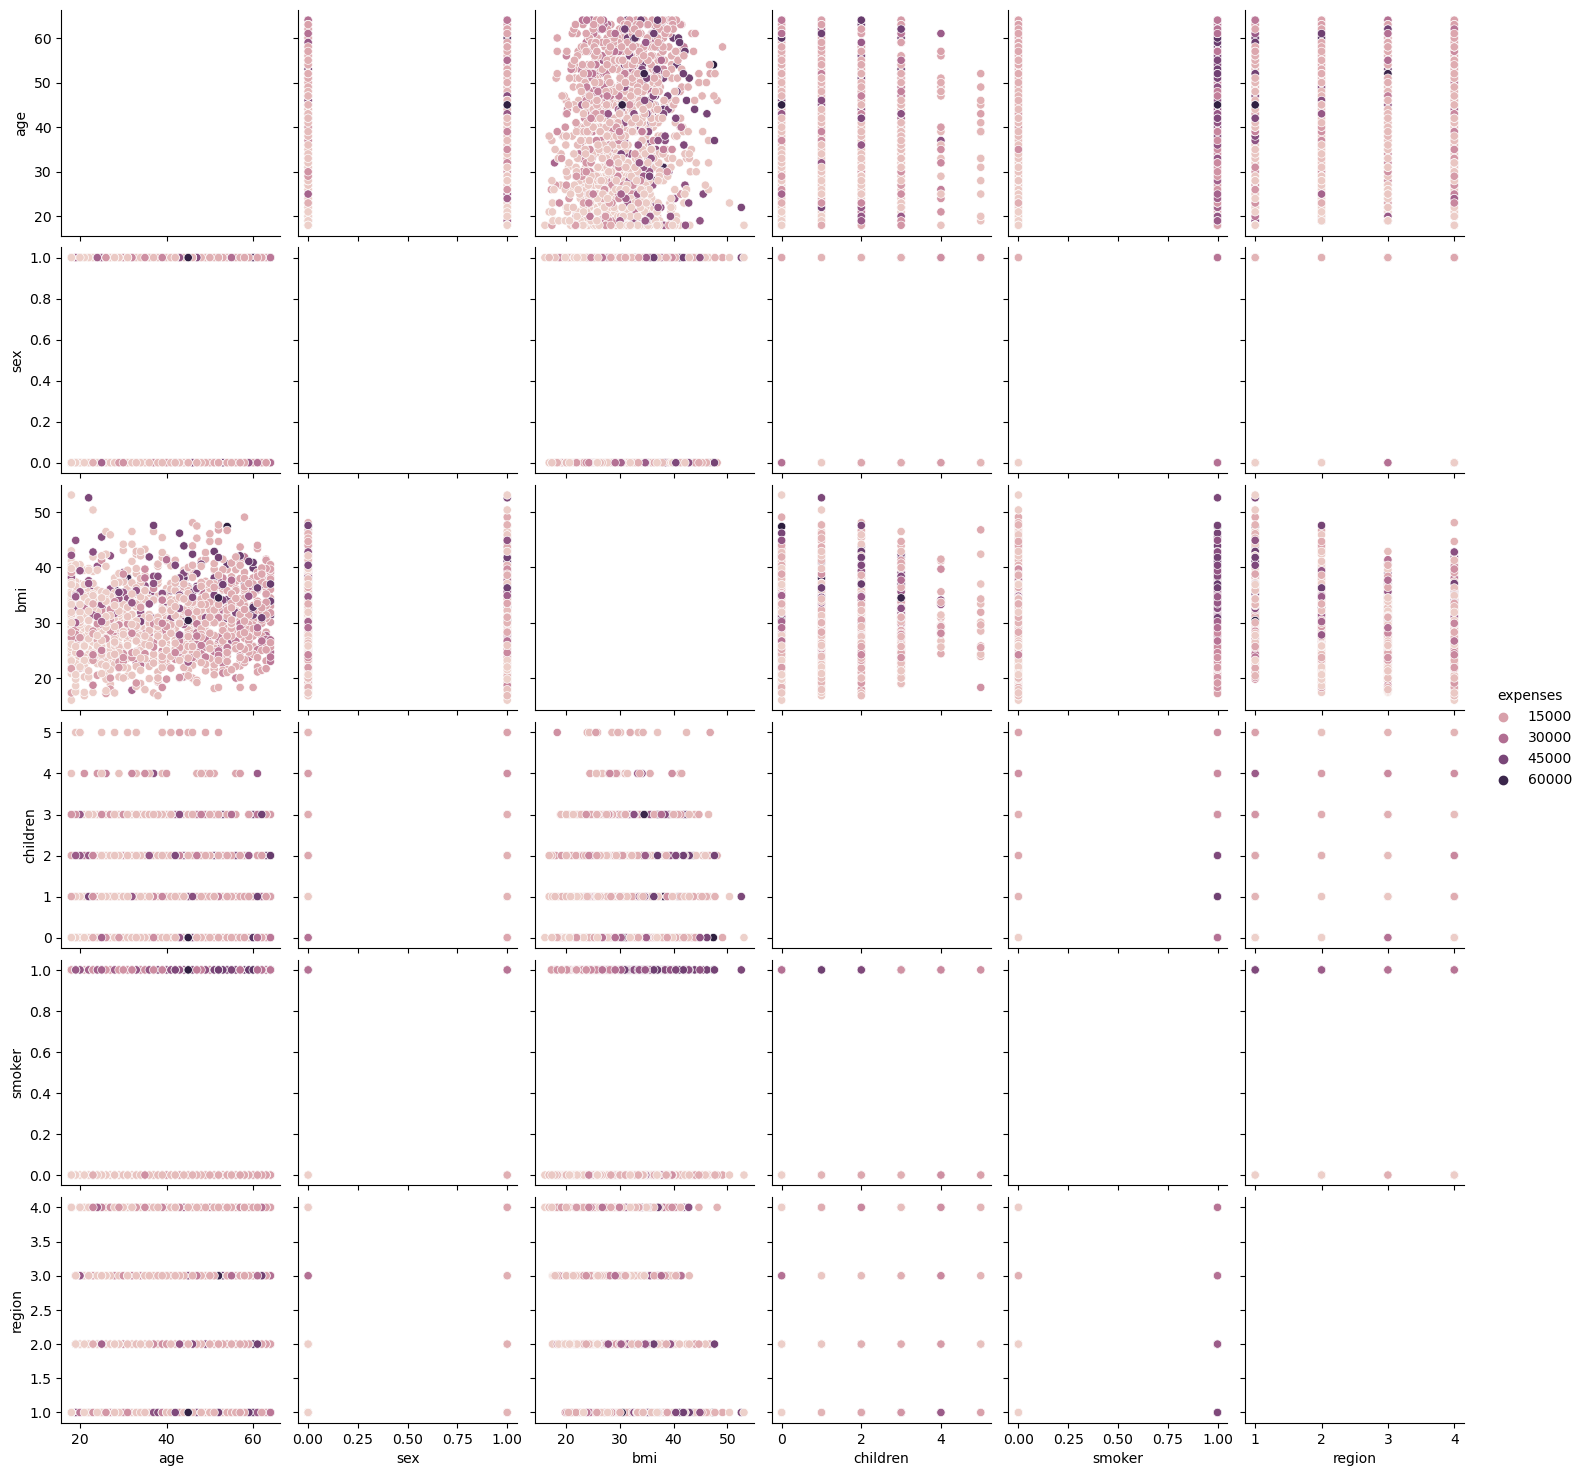

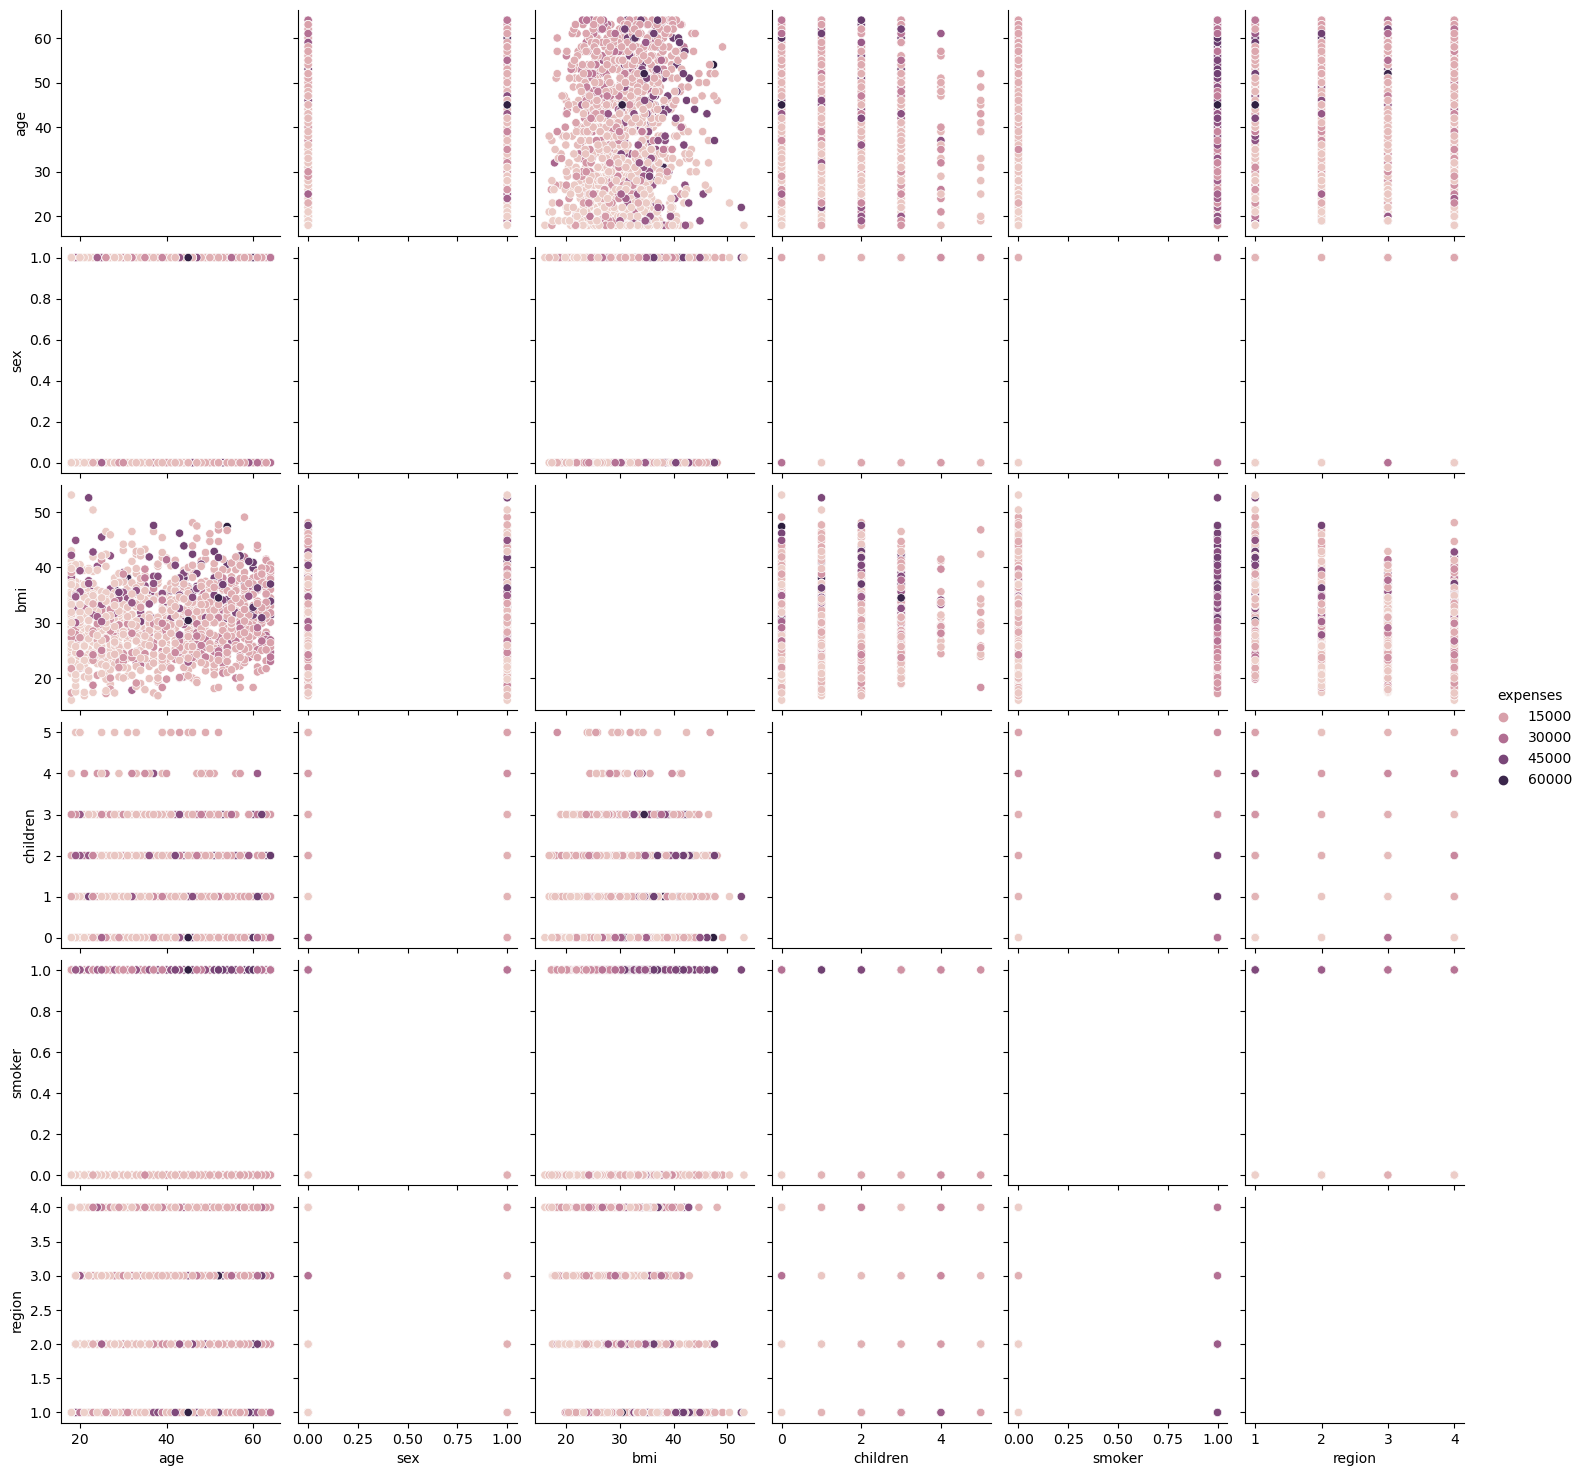

In [107]:
sns.pairplot(df_clean,hue="expenses")
plt.show()

### Checking the Multicolinearity

Text(0.5, 1.0, 'Correlation Data With Each Other')

Text(0.5, 1.0, 'Correlation Data With Each Other')

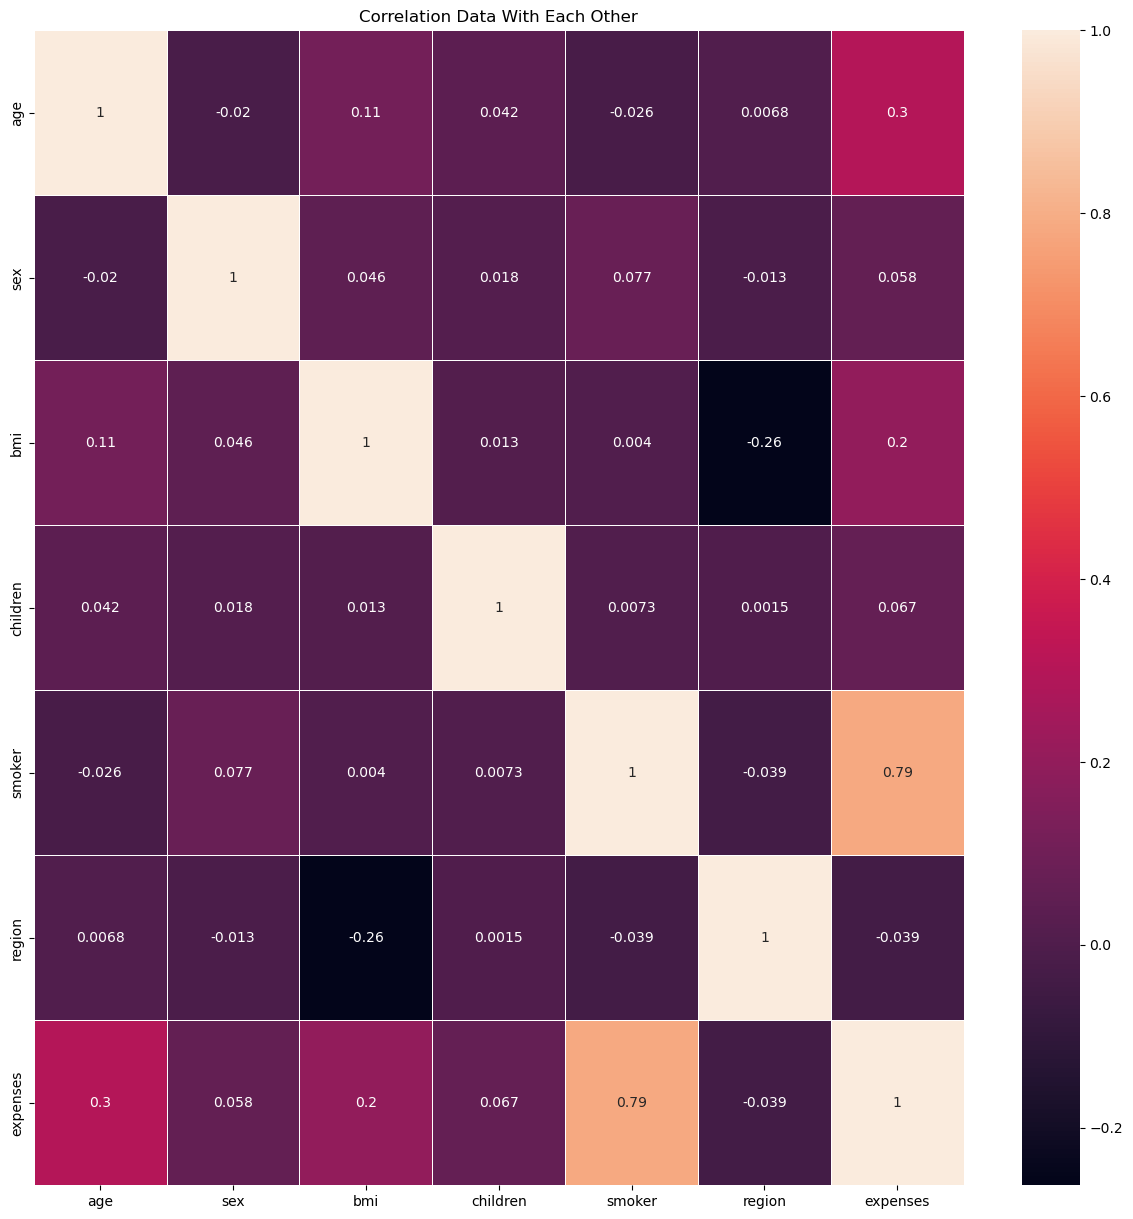

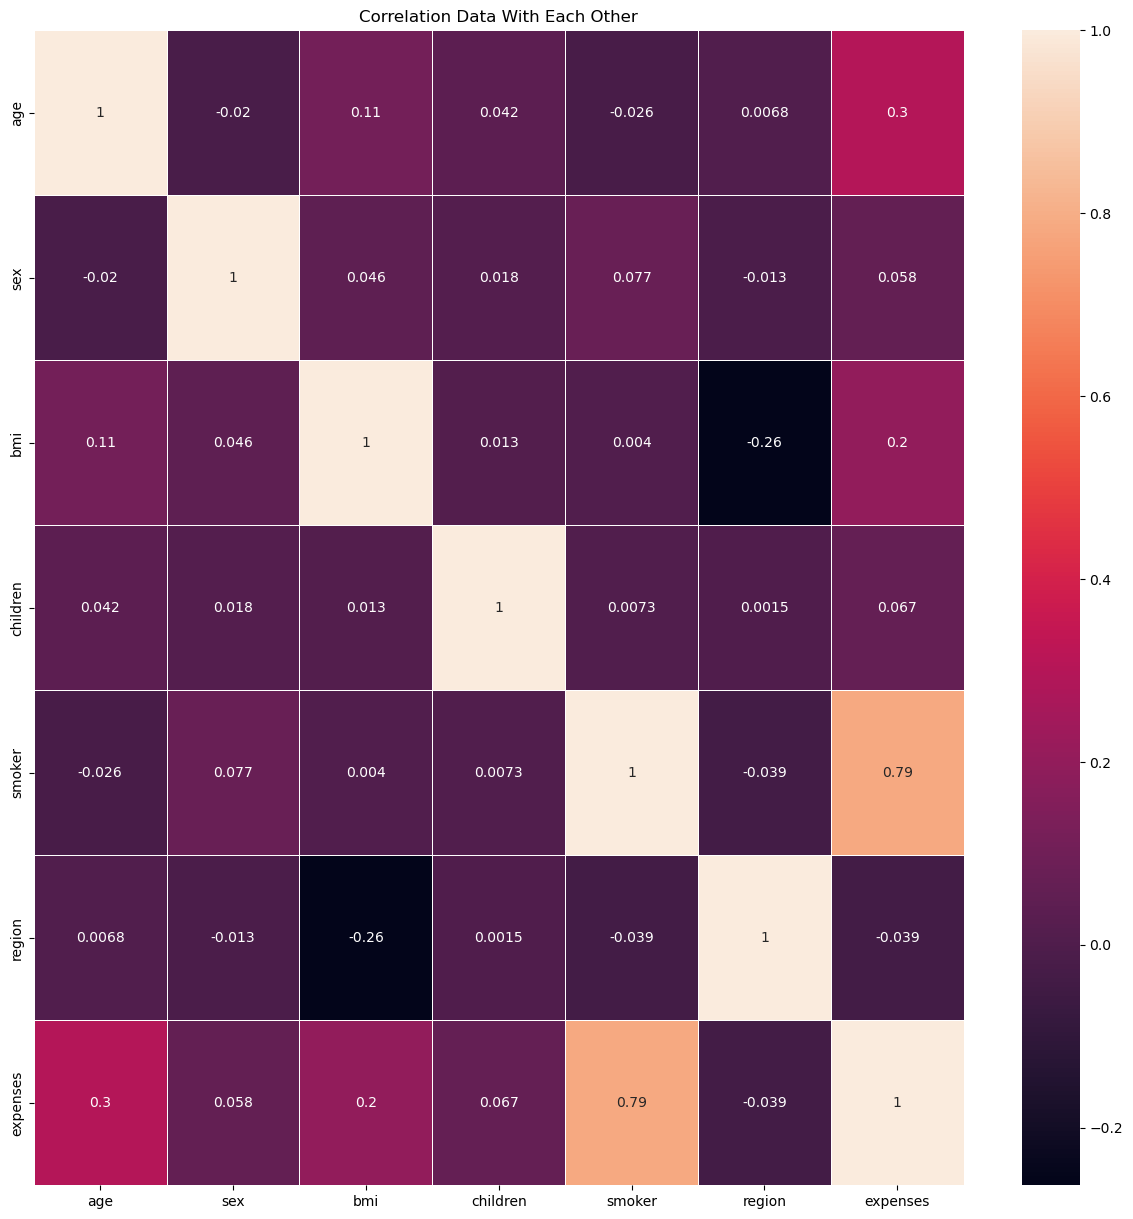

In [108]:
plt.figure(figsize=(15,15))
sns.heatmap(df_clean.corr(), annot=True,linewidths=0.5)
plt.title('Correlation Data With Each Other')

- `Age: There is a weak positive correlation (r = 0.11) between age and BMI in this dataset, indicating that as age increases, so does BMI (on average). There is also a moderate positive correlation (r = 0.30) between age and expenses, suggesting that older people tend to have higher healthcare costs.`

- `Sex: There is a weak negative correlation (r = -0.02) between sex and age in this dataset, indicating that, on average, males are slightly younger than females. There is also a weak positive correlation (r = 0.06) between sex and expenses, suggesting that, on average, males may have slightly higher healthcare costs than females.`

- `BMI: There is a weak positive correlation (r = 0.10) between BMI and age in this dataset, indicating that as age increases, so does BMI (on average). There is also a moderate positive correlation (r = 0.20) between BMI and expenses, suggesting that people with higher BMIs tend to have higher healthcare costs.`

- `Children: There is a weak positive correlation (r = 0.04) between the number of children and age in this dataset, suggesting that older people tend to have more children (on average). There is also a weak positive correlation (r = 0.07) between the number of children and expenses, indicating that people with more children may have slightly higher healthcare costs.`

- `Smoker: There is a strong positive correlation (r = 0.79) between smoker and expenses in this dataset, indicating that people who smoke tend to have much higher healthcare costs than non-smokers. There is also a weak positive correlation (r = 0.08) between smoker and age, suggesting that smokers may be slightly older (on average) than non-smokers.`

- `Region: There is a weak negative correlation (r = -0.04) between region and expenses in this dataset, indicating that people from certain regions may have slightly lower healthcare costs than others. There is also a weak negative correlation (r = -0.26) between region and BMI, suggesting that people from certain regions may have lower BMIs (on average) than others.`

- `Overall, these insights suggest that age, BMI, smoking status, and number of children are important factors to consider when predicting healthcare expenses, while sex and region may have weaker or less consistent relationships with healthcare costs in this dataset.`

- __`Splitting of data to avoid Data leakage`__

In [109]:
df_clean.head(1)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,2,16884.92


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,2,16884.92


In [110]:
x=df_clean.drop('expenses',axis=1)

In [111]:
y=df_clean[['expenses']]

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [113]:
x_train # what ever opration is done is on the x_train data only

,age,sex,bmi,children,smoker,region
138,54,0,31.9,3,0,1
381,55,1,30.7,0,1,4
292,25,1,45.5,2,1,1
1090,47,1,36.2,0,1,1
893,47,1,38.9,2,1,1
...,...,...,...,...,...,...
1096,51,0,35.0,2,1,4
1131,27,1,45.9,2,0,2
1295,20,1,22.0,1,0,2
861,38,0,28.0,3,0,2


,age,sex,bmi,children,smoker,region
138,54,0,31.9,3,0,1
381,55,1,30.7,0,1,4
292,25,1,45.5,2,1,1
1090,47,1,36.2,0,1,1
893,47,1,38.9,2,1,1
...,...,...,...,...,...,...
1096,51,0,35.0,2,1,4
1131,27,1,45.9,2,0,2
1295,20,1,22.0,1,0,2
861,38,0,28.0,3,0,2


# Model Building

### Linear Regression

In [114]:
lr_reg=LinearRegression()

In [115]:
lr_reg.fit(x_train,y_train)

LinearRegression()

LinearRegression()

In [116]:
# train model evaluation
y_pred_train=lr_reg.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mse)

rms=np.sqrt(mse)
print('Root Mean Squared Error :',rms)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Aabsolut Error : ',mae)

r_2=r2_score(y_train,y_pred_train)
print('R-Squared [Coefficent of Determination] :',r_2)

Mean Squared Error : 35815420.23589696
Root Mean Squared Error : 5984.59858602872
Mean Aabsolut Error :  4168.366361154204
R-Squared [Coefficent of Determination] : 0.736245402991969
Mean Squared Error : 35815420.23589696
Root Mean Squared Error : 5984.59858602872
Mean Aabsolut Error :  4168.366361154204
R-Squared [Coefficent of Determination] : 0.736245402991969


In [117]:
# testing model evaluation 
y_pred_test=lr_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_test,y_pred_test)
print('R-Squared [Coefficent of Determination] :',r_2)

Mean Squared Error : 38942086.69805049
Root Mean Squared Error : 6240.359500705908
Mean Absolute Error : 4179.462631670781
R-Squared [Coefficent of Determination] : 0.7724251547998253
Mean Squared Error : 38942086.69805049
Root Mean Squared Error : 6240.359500705908
Mean Absolute Error : 4179.462631670781
R-Squared [Coefficent of Determination] : 0.7724251547998253


## KNN

In [118]:
knn_reg=KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

KNeighborsRegressor()

In [119]:
# train model evaluation

y_pred_train=knn_reg.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_train,y_pred_train)
print('R-Squared [Coefficent of Determination] :',r_2 )

Mean Squared Error : 84524742.42395145
Root Mean Squared Error : 9193.733867365938
Mean Absolute Error : 6268.886014973262
R-Squared [Coefficent of Determination] : 0.37753656865116436
Mean Squared Error : 84524742.42395145
Root Mean Squared Error : 9193.733867365938
Mean Absolute Error : 6268.886014973262
R-Squared [Coefficent of Determination] : 0.37753656865116436


In [120]:
# testing model evaluation 
y_pred_test=knn_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_test,y_pred_test)
print('R-Squared [Coefficent of Determination] :',r_2 )

Mean Squared Error : 157450363.91102478
Root Mean Squared Error : 12547.922693060584
Mean Absolute Error : 8318.84603482587
R-Squared [Coefficent of Determination] : 0.07987102818615954
Mean Squared Error : 157450363.91102478
Root Mean Squared Error : 12547.922693060584
Mean Absolute Error : 8318.84603482587
R-Squared [Coefficent of Determination] : 0.07987102818615954


- __`very low accuracy bais model`__

### Decision Tree

In [121]:
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

DecisionTreeRegressor()

In [122]:
# train model evaluation

y_pred_train=dt_reg.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Square Error :',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_train,y_pred_train)
print('R-Squared :',r_2)

Mean Squared Error : 0.0
Root Mean Square Error : 0.0
Mean Absolute Error : 0.0
R-Squared : 1.0
Mean Squared Error : 0.0
Root Mean Square Error : 0.0
Mean Absolute Error : 0.0
R-Squared : 1.0


In [123]:
# testing model evaluation
y_pred_test=dt_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Square Error :',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_test,y_pred_test)
print('R-Squared :',r_2)

Mean Squared Error : 36676827.73350448
Root Mean Square Error : 6056.139672555817
Mean Absolute Error : 2757.6140796019904
R-Squared : 0.7856631705793103
Mean Squared Error : 36676827.73350448
Root Mean Square Error : 6056.139672555817
Mean Absolute Error : 2757.6140796019904
R-Squared : 0.7856631705793103


In [124]:
1-0.78

0.21999999999999997

0.21999999999999997

- __`over fitting the model`__
- __`bais model`__

### Random forest

In [125]:
random_ft_reg=RandomForestRegressor(random_state=42)
random_ft_reg.fit(x_train,y_train)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18524\3713397885.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_ft_reg.fit(x_train,y_train)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18524\3713397885.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_ft_reg.fit(x_train,y_train)


RandomForestRegressor(random_state=42)

RandomForestRegressor(random_state=42)

In [126]:
# training model evaluation
y_train_pred=random_ft_reg.predict(x_train)

mse=mean_squared_error(y_train,y_train_pred)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)

mae=mean_absolute_error(y_train,y_train_pred)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_train,y_train_pred)
print('R-Squared :',r_2)

Mean Squared Error : 3491523.0496640746
Root Mean Squared Error : 1868.5617596601066
Mean Absolute Error : 1022.3254597860961
R-Squared : 0.9742874647611869
Mean Squared Error : 3491523.0496640746
Root Mean Squared Error : 1868.5617596601066
Mean Absolute Error : 1022.3254597860961
R-Squared : 0.9742874647611869


In [127]:
# testing model evaluation
y_pred_test=random_ft_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_test,y_pred_test)
print('R-Squared [coeffiecent of determination] :',r_2)

Mean Squared Error : 23309076.648901794
Root Mean Squared Error 4827.94745713971
Mean Absolute Error : 2606.130424378109
R-Squared [coeffiecent of determination] : 0.8637833778332585
Mean Squared Error : 23309076.648901794
Root Mean Squared Error 4827.94745713971
Mean Absolute Error : 2606.130424378109
R-Squared [coeffiecent of determination] : 0.8637833778332585


`Insight:`
    - `Highest accuracy till now`
    - ` But model is getting over fitting (high bay and low variance)`

In [128]:
0.974-0.864

0.10999999999999999

0.10999999999999999

### Gradiant boost

In [129]:
# GradientBoostingRegressor

gb_reg=GradientBoostingRegressor(random_state=42)
gb_reg.fit(x_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

GradientBoostingRegressor(random_state=42)

In [130]:
# Training data evaluation
y_pred_train=gb_reg.predict(x_train)

mes=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mes)

rmes=np.sqrt(mes)
print('Root Mean Squared Error:',rmes)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_train,y_pred_train)
print('R-Squared :',r_2)

Mean Squared Error : 13547771.585101396
Root Mean Squared Error: 3680.729762574454
Mean Absolute Error : 1997.0108326402922
R-Squared : 0.9002304870011311
Mean Squared Error : 13547771.585101396
Root Mean Squared Error: 3680.729762574454
Mean Absolute Error : 1997.0108326402922
R-Squared : 0.9002304870011311


In [131]:
# Testing data evaluation
y_pred_test=gb_reg.predict(x_test)

mes=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',mes)

rmes=np.sqrt(mes)
print('Root Mean Squared Error:',rmes)

mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_test,y_pred_test)
print('R-Squared :',r_2)
gb_reg.get_params()

Mean Squared Error : 22544935.525369853
Root Mean Squared Error: 4748.150747961763
Mean Absolute Error : 2630.783315769004
R-Squared : 0.868248965392735
Mean Squared Error : 22544935.525369853
Root Mean Squared Error: 4748.150747961763
Mean Absolute Error : 2630.783315769004
R-Squared : 0.868248965392735


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [132]:
0.90 - 0.87

0.030000000000000027

0.030000000000000027

- `Insight: `
    - `Best model ever good accuracy not overfitting and underfitting`

### AdaBoostRegressor

In [133]:
adb_reg=AdaBoostRegressor(n_estimators=10, random_state=42)
adb_reg.fit(x_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=10, random_state=42)

AdaBoostRegressor(n_estimators=10, random_state=42)

In [134]:
# training data evaluation
y_pred_train=adb_reg.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_train,y_pred_train)
print('R-Squared :',r_2)

Mean Squared Error : 21233464.647845246
Root Mean Squared Error : 4607.978368856048
Mean Absolute Error : 3412.0296255410344
R-Squared : 0.8436309311913777
Mean Squared Error : 21233464.647845246
Root Mean Squared Error : 4607.978368856048
Mean Absolute Error : 3412.0296255410344
R-Squared : 0.8436309311913777


In [135]:
# training data evaluation
y_pred_test=adb_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_test,y_pred_test)
print('R-Squared :',r_2)

Mean Squared Error : 24962249.144751344
Root Mean Squared Error : 4996.223488271051
Mean Absolute Error : 3600.214780477301
R-Squared : 0.8541223527898578
Mean Squared Error : 24962249.144751344
Root Mean Squared Error : 4996.223488271051
Mean Absolute Error : 3600.214780477301
R-Squared : 0.8541223527898578


In [136]:
0.854-0.843

0.01100000000000001

0.01100000000000001

- `Insight:`
   - `this is also good model`

# Hyper-Parameter-Tuning

- `We are doing hyper parameter tunning of thos model which are near to the good accuracy  in our case 2 model are giving good accuracy and not overfitting also`
- `1] AdaBoostRegressor [ test_accuracy=0.854 and train_accuracy=0.843] `
- `2] GradientBoostingRegressor [test_accuracy=0.9 and train_accuracy=0.87] `

### Hyper-Parameter-Tunning [GradientBoostingRegressor]

In [137]:
# Importing library
from sklearn.model_selection import GridSearchCV

In [138]:
# Set the hyperparameter grid
param_grid= {'n_estimators': [50, 100, 200],
              'max_depth': [2, 3, 4],
              'learning_rate': [0.1, 0.01, 0.001]}

In [139]:
# Create the grid search object
grid_gb=GridSearchCV(gb_reg,param_grid,cv=5)

In [140]:
# Fit the grid search object to the data
grid_gb.fit(x_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 200]})

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 200]})

In [141]:
# Print the best hyperparameters
print(grid_gb.best_params_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


`{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100} using this parameter now traing new GradientBoostingRegressor model`

In [142]:
grid_gb_reg=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 2, n_estimators= 100)
grid_gb_reg.fit(x_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=2)

GradientBoostingRegressor(max_depth=2)

In [143]:
#Training data evaluation
y_pred_train=grid_gb_reg.predict(x_train)

mes=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mes)

rmes=np.sqrt(mes)
print('Root Mean Squared Error:',rmes)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_train,y_pred_train)
print('R-Squared :',r_2)

Mean Squared Error : 16664711.638875943
Root Mean Squared Error: 4082.2434565904987
Mean Absolute Error : 2277.614727068162
R-Squared : 0.8772764838827336
Mean Squared Error : 16664711.638875943
Root Mean Squared Error: 4082.2434565904987
Mean Absolute Error : 2277.614727068162
R-Squared : 0.8772764838827336


In [144]:
# Testing data evaluation
y_pred_test=grid_gb_reg.predict(x_test)

mes=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',mes)

rmes=np.sqrt(mes)
print('Root Mean Squared Error:',rmes)

mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_test,y_pred_test)
print('R-Squared :',r_2)

Mean Squared Error : 22233977.89006233
Root Mean Squared Error: 4715.291919919946
Mean Absolute Error : 2622.32797565344
R-Squared : 0.8700661801780554
Mean Squared Error : 22233977.89006233
Root Mean Squared Error: 4715.291919919946
Mean Absolute Error : 2622.32797565344
R-Squared : 0.8700661801780554


In [145]:
########################################################################################################

we are selecting the model of(because of high acuracy with no overfitting and outfitting  __`Hyper-Parameter-Tunning [GradientBoostingRegressor]`__

- `for training data [ R-Squared : 0.8759857175067005 ]`
- `for testing data  [ R-Squared : 0.8692310106334666 ]`

In [146]:
# creating the pikcel file for model
with open ('model.pkl','wb') as file:
    pickle.dump(grid_gb_reg,file)

In [147]:
########################################################################################################

### Hyper-Parameter-Tunning [AdaBoostRegressor]

In [148]:
param_grid={'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001]}

In [149]:
grid_adb=GridSearchCV(adb_reg,param_grid,cv=5)

In [150]:
grid_adb.fit(x_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(n_estimators=10, random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]})

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(n_estimators=10, random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]})

In [151]:
print(grid_adb.best_params_)

{'learning_rate': 0.01, 'n_estimators': 50}
{'learning_rate': 0.01, 'n_estimators': 50}


In [152]:
grid_adb_reg=AdaBoostRegressor(learning_rate=0.01,n_estimators=50)
grid_adb_reg.fit(x_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=0.01)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=0.01)

In [153]:
# training data evaluation
y_pred_train=grid_adb_reg.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error :',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_train,y_pred_train)
print('R-Squared :',r_2)

Mean Squared Error : 19850422.23278076
Root Mean Squared Error : 4455.3812668256305
Mean Absolute Error : 2761.2724893244767
R-Squared : 0.8538160356080706
Mean Squared Error : 19850422.23278076
Root Mean Squared Error : 4455.3812668256305
Mean Absolute Error : 2761.2724893244767
R-Squared : 0.8538160356080706


In [154]:
# Testing data evaluation
y_pred_test=grid_adb_reg.predict(x_test)

mes=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',mes)

rmes=np.sqrt(mes)
print('Root Mean Squared Error:',rmes)

mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error :',mae)

r_2=r2_score(y_test,y_pred_test)
print('R-Squared :',r_2)

Mean Squared Error : 23675089.019804265
Root Mean Squared Error: 4865.705397966904
Mean Absolute Error : 2985.3795783602927
R-Squared : 0.8616444270036501
Mean Squared Error : 23675089.019804265
Root Mean Squared Error: 4865.705397966904
Mean Absolute Error : 2985.3795783602927
R-Squared : 0.8616444270036501
